<a href="https://colab.research.google.com/github/tmoura/softexIA/blob/main/DadosDesbalanceados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/tmoura/machinelearning/master/datasets/bank-full.csv"

dados = pd.read_csv(url)

In [ ]:
dados.head()

In [ ]:
dados.info()

In [7]:
dados["default"] = dados["default"].map({"no":0,"yes":1})
dados["housing"] = dados["housing"].map({"no":0,"yes":1})
dados["loan"] = dados["loan"].map({"no":0,"yes":1})
dados["Target"] = dados["Target"].map({"no":0,"yes":1})
dados.education = dados.education.map({"primary": 0, "secondary":1, "tertiary":2})
dados.poutcome = dados.poutcome.map({"unknown": 0, "failure":1, "other":2, "success":3})
dados.contact = dados.contact.map({"cellular": 0, "unknown":1, "telephone":2})
dados.month = pd.to_datetime(dados.month, format = "%b").dt.month

In [ ]:
dados.isnull().sum()

In [ ]:
dados.Target.value_counts()

In [11]:
dados.dropna(inplace = True)

In [ ]:
dados.Target.value_counts()

In [ ]:
# Transformação das colunas restantes em numéricas: cada string única é transformada em uma coluna, se o registro existir para aquela coluna ela recebe 1 e zero para as demais colunas.
dados = pd.get_dummies(dados)
dados.head().T

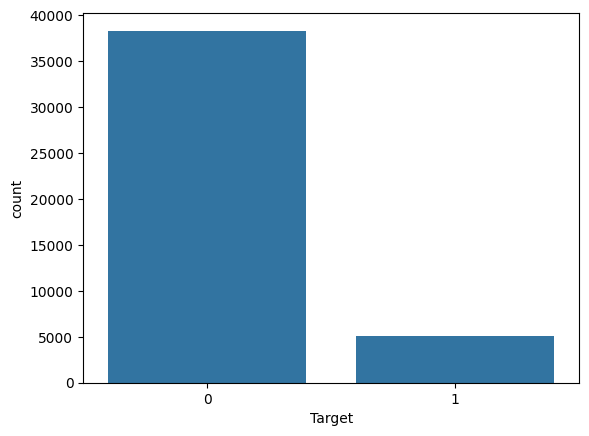

In [15]:
dados.Target.value_counts()
ax = sns.countplot(x="Target", data=dados)

In [16]:
# Instanciando um algoritmo de classificação

lrmodelo = LogisticRegression(max_iter=3000)

In [ ]:
X = dados.drop("Target", axis = 1)
X

In [ ]:
y = dados.Target
y

In [20]:
# Separando dados de treino e de teste, usando o padrão de 70-30

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [21]:
# Treinando o algoritmo

lrmodelo.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [22]:
y_pred = lrmodelo.predict(X_test)

In [23]:
accuracy_score(y_test, y_pred)

0.8993449580219578

In [ ]:
print (classification_report(y_test, y_pred))

In [ ]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

In [ ]:
# Vamos balancear usando primeiro o undersampling

In [25]:
nr = NearMiss()

In [26]:
X,y = nr.fit_resample(X,y)

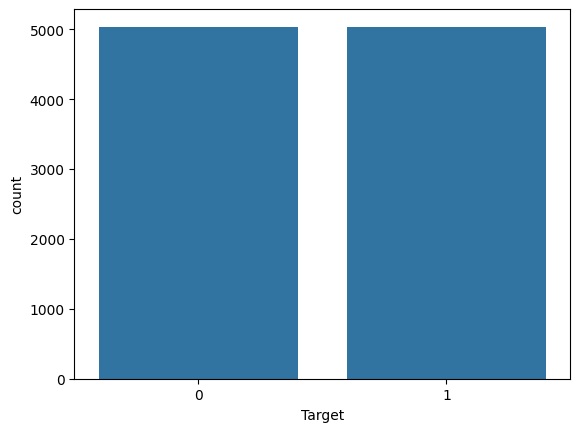

In [27]:
ax = sns.countplot(x=y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [29]:
lrmodelo2 = LogisticRegression(max_iter=2000)

In [30]:
# Treinando o algoritmo

lrmodelo2.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [31]:
y_pred = lrmodelo2.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred)

0.8785232235013894

In [33]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1259
           1       0.91      0.85      0.87      1260

    accuracy                           0.88      2519
   macro avg       0.88      0.88      0.88      2519
weighted avg       0.88      0.88      0.88      2519



In [34]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1148   111  1259
1         195  1065  1260
All      1343  1176  2519


In [ ]:
# Vamos testar o SMOTE

In [ ]:
X = dados.drop("y", axis = 1)
y = dados.y

In [ ]:
np.bincount(y)

array([38317,  5037])

In [ ]:
smt = SMOTE()

In [ ]:
# X, y = smt.fit_sample(X, y)

In [ ]:
np.bincount(y)

array([38317,  5037])

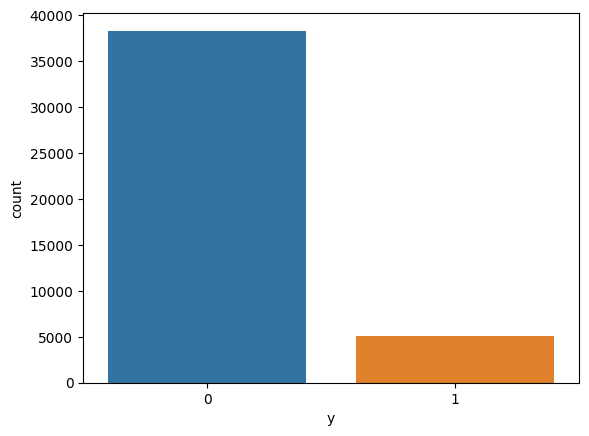

In [ ]:
ax = sns.countplot(x=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [ ]:
lrmodelo3 = LogisticRegression(max_iter=2500)

In [ ]:
lrmodelo3.fit(X_train, y_train)

In [ ]:
y_pred = lrmodelo3.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8114724150529777

In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      9579
           1       0.82      0.80      0.81      9580

    accuracy                           0.81     19159
   macro avg       0.81      0.81      0.81     19159
weighted avg       0.81      0.81      0.81     19159

